In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
sns.set_style("darkgrid")

In [86]:
df = pd.read_csv("bank.csv", sep = ";")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [120]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


In [100]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

/Users/emisohpi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/Users/emisohpi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/emisohpi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until 

<Figure size 1440x432 with 0 Axes>

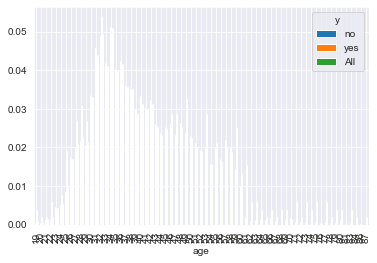

<Figure size 1440x432 with 0 Axes>

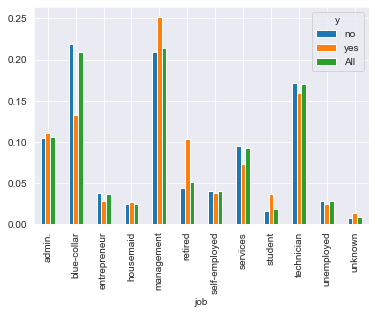

<Figure size 1440x432 with 0 Axes>

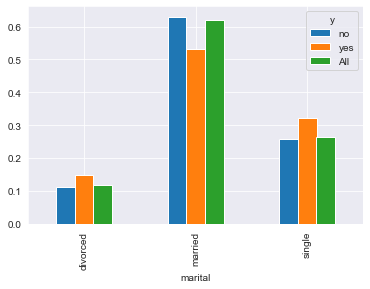

<Figure size 1440x432 with 0 Axes>

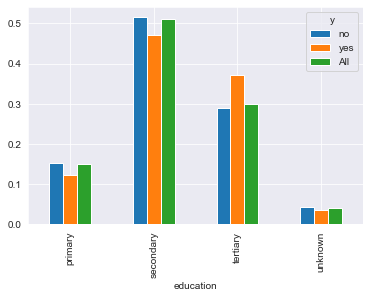

<Figure size 1440x432 with 0 Axes>

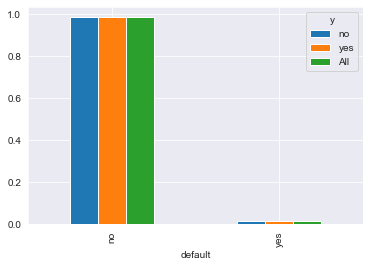

<Figure size 1440x432 with 0 Axes>

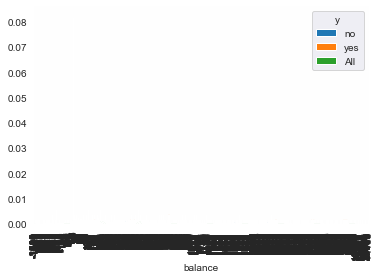

<Figure size 1440x432 with 0 Axes>

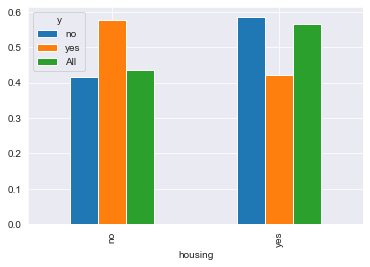

<Figure size 1440x432 with 0 Axes>

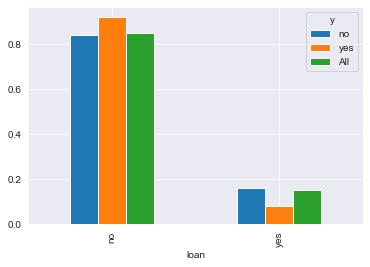

<Figure size 1440x432 with 0 Axes>

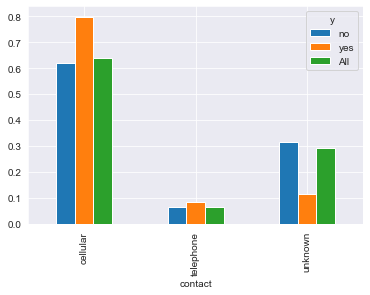

<Figure size 1440x432 with 0 Axes>

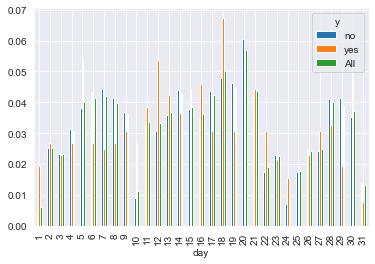

<Figure size 1440x432 with 0 Axes>

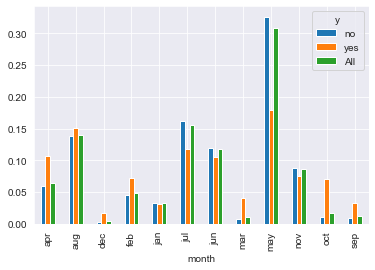

<Figure size 1440x432 with 0 Axes>

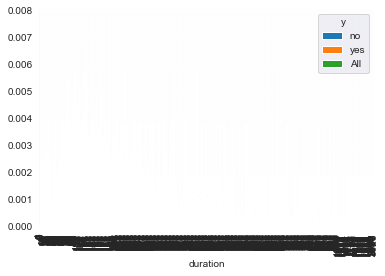

<Figure size 1440x432 with 0 Axes>

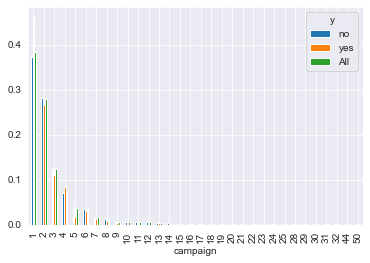

<Figure size 1440x432 with 0 Axes>

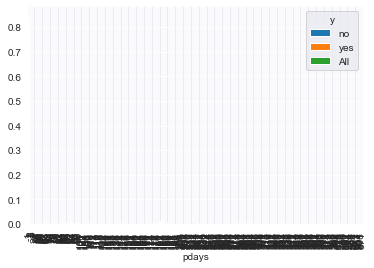

<Figure size 1440x432 with 0 Axes>

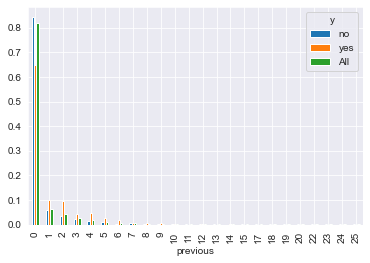

<Figure size 1440x432 with 0 Axes>

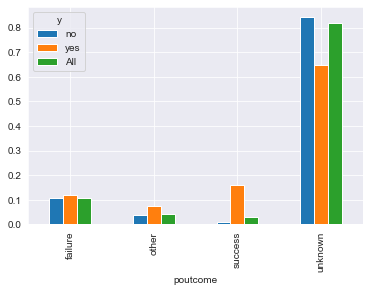

<Figure size 1440x432 with 0 Axes>

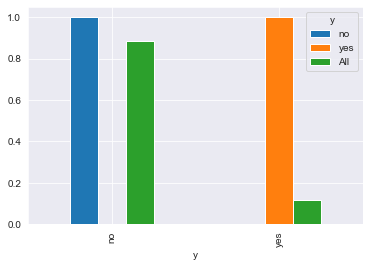

In [102]:
for column in df.columns:
    plt.figure(figsize=(20, 6))
    ta_ = pd.crosstab(df[column], df.y, margins=True, normalize="columns")
    ta_.plot.bar()

<Figure size 1440x432 with 0 Axes>

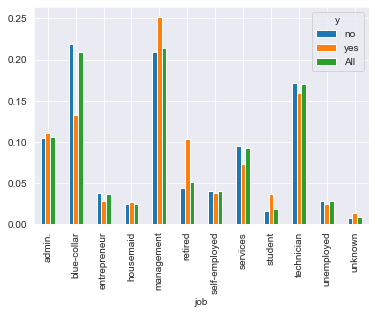

In [106]:
plt.figure(figsize=(20, 6))
ta_ = pd.crosstab(df.job, df.y, margins=True, normalize="columns")
ta_.plot.bar()

In [107]:
pd.crosstab(df.job, df.y, margins=True, normalize="columns")

y,no,yes,All
job,,,
admin.,0.10500,0.111324,0.105729
blue-collar,0.21925,0.132438,0.209246
entrepreneur,0.03825,0.028791,0.037160
housemaid,0.02450,0.026871,0.024773
management,0.20950,0.251440,0.214333
retired,0.04400,0.103647,0.050874
self-employed,0.04075,0.038388,0.040478
services,0.09475,0.072937,0.092236
student,0.01625,0.036468,0.018580


In [117]:
len(df[df.job=="blue-collar"])

946

In [7]:
output = df.pop("y")

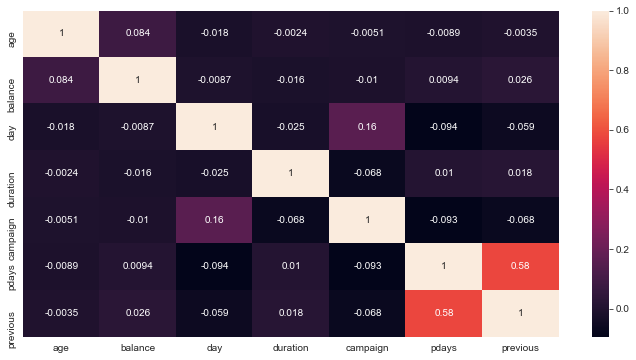

In [11]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)

In [17]:
categorical = df.select_dtypes(["object"]).columns.tolist()
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [18]:
dummy = pd.get_dummies(df[categorical])

In [20]:
dummy.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [23]:
df.select_dtypes(exclude=["object"])

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [33]:
numerical = df.select_dtypes(exclude=["object"])
numerical

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [34]:
X = pd.concat([dummy, numerical], axis=1)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,30,1787,19,79,1,-1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,33,4789,11,220,1,339,4
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,35,1350,16,185,1,330,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,30,1476,3,199,4,-1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,0,1,33,-333,30,329,5,-1,0
4517,0,0,0,0,0,0,1,0,0,0,...,0,0,1,57,-3313,9,153,1,-1,0
4518,0,0,0,0,0,0,0,0,0,1,...,0,0,1,57,295,19,151,11,-1,0
4519,0,1,0,0,0,0,0,0,0,0,...,1,0,0,28,1137,6,129,4,211,3


In [138]:
for column in df:
    print(column)

age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
y


In [147]:
numerical

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


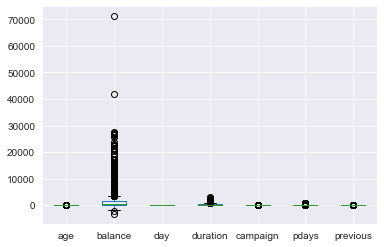

In [161]:
df.boxplot()

In [163]:
df.balance.max()

71188

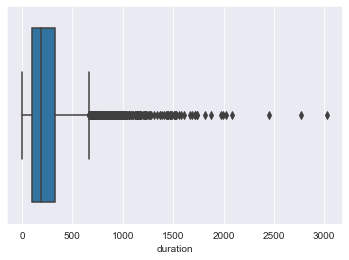

In [152]:
sns.boxplot(df["duration"])

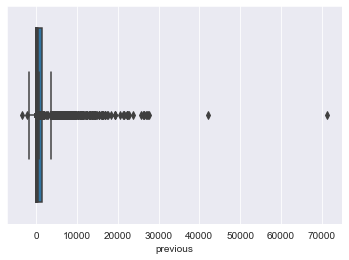

In [153]:
for column in numerical:
    sns.boxplot(df[column], orient="vertical")
    #sns.boxplot(df, orient="vertical")

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
output=encoder.fit_transform(output)

In [77]:
output = output[np.newaxis, :]

In [123]:
X = X
y = output
print(X)
print(y)

[[  0   0   0 ...   1  -1   0]
 [  0   0   0 ...   1 339   4]
 [  0   0   0 ...   1 330   1]
 ...
 [  0   0   0 ...  11  -1   0]
 [  0   1   0 ...   4 211   3]
 [  0   0   1 ...   2 249   7]]
[[0 0 0 ... 0 0 0]]


In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [4521, 1]

In [126]:
model = lgb.LGBMClassifier(objective='binary',
                        num_leaves = 23,
                        learning_rate=0.1,
                        n_estimators=100,
                        boosting= "dart")

# 学習する
result = model.fit(X_train, y_train,
                   eval_set=[(X_test, y_test)],
                   eval_metric='multi_logloss' #
                  )

# テストデータで予測する
y_pred = model.predict(X_test)

# Accuracy を計算する
print(f"accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}") #適合率 1と予測した中で実際にどれだけ1であったかの割合 ex)異常検知システムがアラートを出した回数のうち、実際に異常であった割合
print(f"Recall: {recall_score(y_test, y_pred)}") #再現率 実際は1のデータのうち正しく1と予測できた割合 ex)病気の診断システムで再現率100%といった場合
print(f"F1: {f1_score(y_test, y_pred)}")             #F1スコア 適合率と再現率の調和平均
print(confusion_matrix(y_test, y_pred))
# importanceを表示する
# importance = pd.DataFrame(model.feature_importances_, index=df.columns, columns=['importance'])
# display(importance)

[1]	valid_0's binary_logloss: 0.325451
[2]	valid_0's binary_logloss: 0.306989
[3]	valid_0's binary_logloss: 0.294218
[4]	valid_0's binary_logloss: 0.284758
[5]	valid_0's binary_logloss: 0.276883
[6]	valid_0's binary_logloss: 0.268032
[7]	valid_0's binary_logloss: 0.261976
[8]	valid_0's binary_logloss: 0.265287
[9]	valid_0's binary_logloss: 0.259732
[10]	valid_0's binary_logloss: 0.255983
[11]	valid_0's binary_logloss: 0.252042
[12]	valid_0's binary_logloss: 0.253264
[13]	valid_0's binary_logloss: 0.250152
[14]	valid_0's binary_logloss: 0.246413
[15]	valid_0's binary_logloss: 0.243142
[16]	valid_0's binary_logloss: 0.240127
[17]	valid_0's binary_logloss: 0.237897
[18]	valid_0's binary_logloss: 0.235779
[19]	valid_0's binary_logloss: 0.23454
[20]	valid_0's binary_logloss: 0.234067
[21]	valid_0's binary_logloss: 0.233899
[22]	valid_0's binary_logloss: 0.232159
[23]	valid_0's binary_logloss: 0.231034
[24]	valid_0's binary_logloss: 0.230245
[25]	valid_0's binary_logloss: 0.228835
[26]	valid